## TODO:

It probably makes more sense to drop papers rather than simply co-author relationships, as that may be a more helpful real-world prediction task. Regardless, here we are simply dealing with co-authorships, and may be dropping a relationship within the same paper.

In [1]:
import collections
import itertools
import tempfile
import time
import re

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import requests
import scipy.sparse
import tqdm

import xswap
import analysis

%matplotlib inline

In [2]:
url = ('https://raw.githubusercontent.com/zietzm/biorxiv-co-authorship/'
       '62c51d8012b14ca9e5086a7de8743e869521988f'
       '/biorxiv_coauthor.tsv.xz')
edges_df = pd.read_table(url, compression='xz')

edges_df.head()

,id_a,id_b,year
0,163269,188713,2019
1,163269,167153,2019
2,132685,188713,2019
3,132685,163269,2019
4,132685,167153,2019


In [1]:
edges = list(set(map(tuple, edges_df
                            .query('year <= 2015')
                            .filter(items=['id_a', 'id_b'])
                            .values)))

g = nx.from_edgelist(edges)
gc = max(nx.connected_component_subgraphs(g), key=len)

filtered_edges = [edge for edge in gc.edges if edge[0] < edge[1]]
mapped_edges, mapping, _ = xswap.preprocessing.map_str_edges(filtered_edges, False)
adj_mat = analysis.edges_to_matrix(mapped_edges)

nodes = sorted(set([e[0] for e in mapped_edges]).union(set([e[1] for e in mapped_edges])))

len(nodes)

NameError: name 'edges_df' is not defined

In [17]:
%%time

it = analysis.rwr_iter(adj_mat, 0.25, 10)

CPU times: user 40.1 s, sys: 2.96 s, total: 43 s
Wall time: 43.2 s


In [ ]:
%%time

inv = analysis.invertible_rwr(adj_mat.tocsc(), 0.25)

In [6]:
x = [5, 10, 15, 20,]
y = list()
t = list()

for n in x:
    t1 = time.time()
    it = analysis.rwr_iter(adj_mat, 0.25, n)
    t2 = time.time()
    t.append(t2 - t1)
    inv = analysis.invertible_rwr(adj_mat.tocsc(), 0.25)
    y.append(np.abs(it - inv).max())

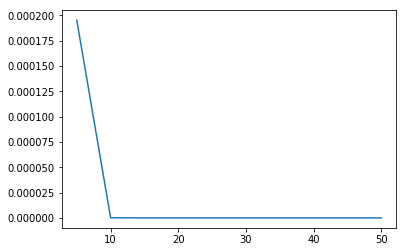

In [18]:
plt.plot(x, y)

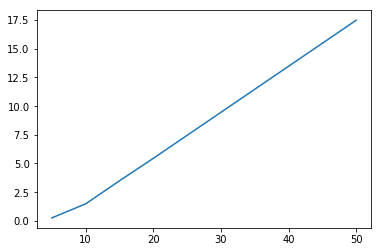

In [10]:
plt.plot(x, t)